# Fisher's Linear Discriminant

## Loading Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [3]:
df = pd.read_csv("dataset_FLD.csv",header = None)
df.columns = ["feature 1","feature 2", "feature 3","label"]

In [4]:
df

,feature 1,feature 2,feature 3,label
0,-6.672418,-1.206198,-1.081050,0
1,1.675598,0.614994,-0.971600,0
2,-4.039058,0.335102,0.544618,1
3,0.793526,-0.235277,0.551771,1
4,3.820273,-0.274691,0.454743,1
...,...,...,...,...
995,-3.680139,0.966962,-0.904337,0
996,-4.063900,0.802611,1.023708,1
997,-0.814430,-0.693945,0.876776,1
998,-0.325122,-0.759024,1.299772,1


In [5]:
data = df.values
X = data[:,:-1]
y = data[:,-1]

In [6]:
# .values converts the dataframe into numpy array
positives = df[df["label"] == 1].values
negatives = df[df["label"] == 0].values

## Visualize Data

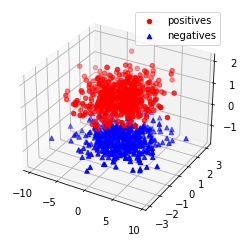

In [7]:
ax = plt.axes(projection='3d')
ax.scatter3D(positives[:,0], positives[:,1], positives[:,2], c='r',marker='o')
ax.scatter3D(negatives[:,0], negatives[:,1], negatives[:,2], c='b',marker='^')
plt.legend(['positives','negatives'])
plt.show()

In [8]:
labels = np.unique(df['label'].values)
features = X.shape[1]

# initialize S_w and S_b as zero matrices
S_w = np.zeros((features,features))
S_b = np.zeros((features,features))

positive_mean = np.mean(X[y==1],axis=0)
negative_mean = np.mean(X[y==0],axis=0)

dataset_mean = np.mean(X,axis=0)

# go through both the classes
for label in labels:
    # collect data with that label
    X_class = X[y==label]
    N_class = X_class.shape[0]
    mu_c = np.mean(X_class,axis=0)
    # (500,3)*(3,500) = (3,3)
    S_w += (1/float(N_class))*(X_class - mu_c).T.dot((X_class - mu_c))
    

In [9]:
mean_difference = (positive_mean - negative_mean).reshape(features,1)
w = np.linalg.inv(S_w).dot(mean_difference)

In [10]:
positive_projections = X[y==1].dot(w)
negative_projections = X[y==0].dot(w)

## Plot of the normal distributions of the pdf's

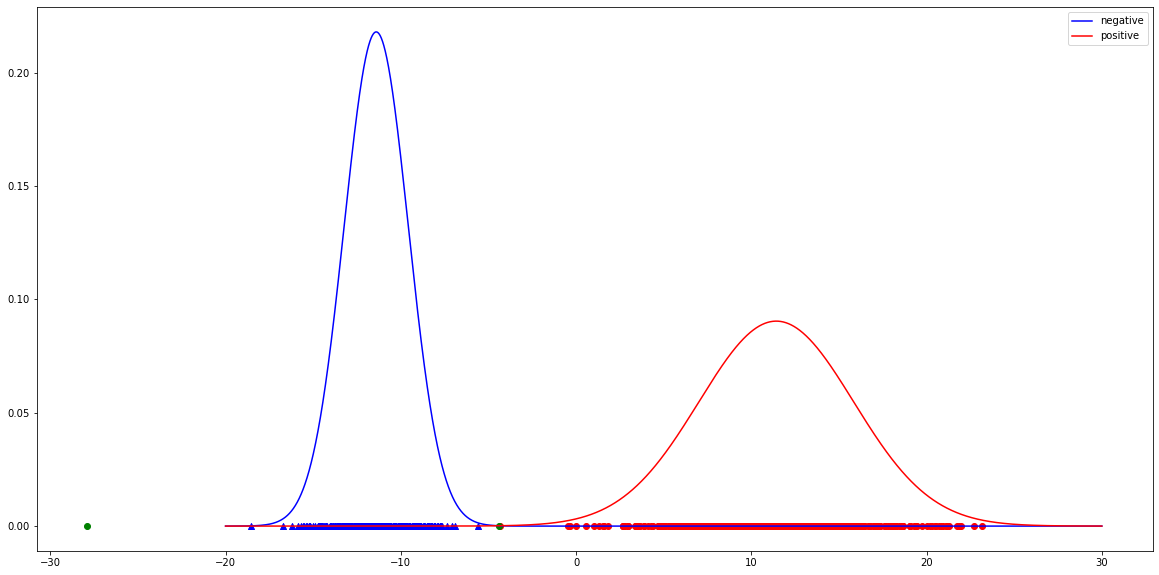

array([-27.88647855,  -4.40693156])

In [15]:
# -0.5*(m1+m2)
#threshold = -0.5*(np.mean(X[y==0].dot(w)) + np.mean(X[y==1].dot(w)))

def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])

def show_gaussians(X):
    colors = ['b','r']
    markers = ['^','o']
    m=[0,0]
    s=[0,0]
    plt.figure(figsize=(20, 10))
    # go through each class
    for i,label in enumerate(labels):
        # find corresponding projections of that class
        label_projections = X[y==label].dot(w)
        # mean of projections
        label_projections_mean = np.mean(label_projections)
        m[i]=label_projections_mean
        # std of projections
        label_projections_std = np.std(label_projections)
        s[i] = label_projections_std
        # here we are taking data upto 3 standard deviations, i.e approx 95% of the data iirc
        #x_data = np.linspace(label_projections_mean - 3*label_projections_std, label_projections_mean + 3*label_projections_std, 100)
        x_axis = np.arange(-20,30,0.01)
        plt.plot(x_axis, stats.norm.pdf(x_axis, label_projections_mean, label_projections_std),c=colors[i])
        plt.scatter(label_projections,np.zeros_like(label_projections),c=colors[i],marker=markers[i])
        # green point is threshold
    threshold = solve(m[0],m[1],s[0],s[1])
    plt.scatter(np.array([threshold]),np.zeros_like(np.array([threshold])),c='g')
    plt.legend(['negative','positive'])
    plt.show()
    return threshold

show_gaussians(X)

In [ ]:
threshold